<a href="https://colab.research.google.com/github/Paresh-0007/MyJourneyWhileLearningAIML/blob/main/TASK_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### `Task` Train a KNN model on glass type dataset and find best n_neighnours.

Data Link: https://drive.google.com/file/d/17cbDNBmys04MJqQfrma3jd72VPMnxIq0/view?usp=share_link

In [1]:
# Your code goes here
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [3]:
data = pd.read_csv('/content/glass.csv')

In [4]:
data.shape

(214, 10)

In [5]:
data.drop_duplicates(inplace=True)

In [6]:
data.shape

(213, 10)

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler()

In [9]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [10]:
X = data.drop('Type',axis =1)

In [11]:
y = data.iloc[:,-1]

In [12]:
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [13]:
y.head()

,Type
0,1
1,1
2,1
3,1
4,1


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [49]:
knn = KNeighborsClassifier(n_neighbors=8)

In [50]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [51]:
y_pred = knn.predict(X_test)

In [52]:
accuracy_score(y_pred,y_test)

0.6744186046511628

In [54]:
n_value = range(1,16)

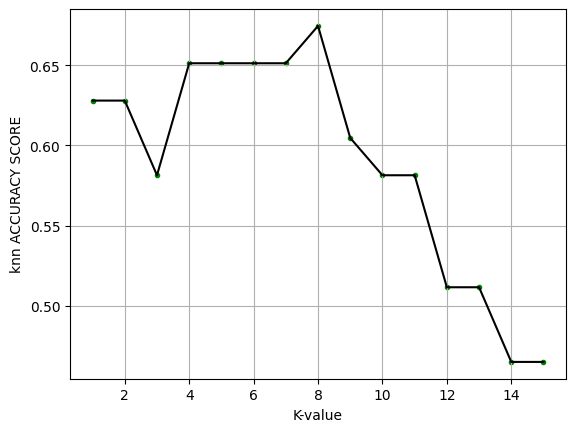

In [65]:
accur = list()

for i in n_value:
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  accur.append(accuracy_score(knn.predict(X_test),y_test))

import matplotlib.pyplot as plt

plt.plot(n_value,accur,color='black')
plt.scatter(n_value,accur,marker='.',color="green")
plt.grid(True)
plt.xlabel('K-value')
plt.ylabel('knn ACCURACY SCORE')
plt.show()